In [7]:
import numpy as np
import pandas as pd
import mnist_reader 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import log_loss
 

# import warnings  
# warnings.filterwarnings("ignore") 


In [8]:
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

X_train, X_valid,y_train, y_valid = train_test_split(X_train,y_train, random_state=104, test_size=0.85, shuffle=True)

In [9]:
def fitter( epochs , batches , mlp , X_train , y_train , X_valid , y_valid ):   ## Function for partial fit
    train_samples = X_train.shape[0]
    features = np.unique(y_train) 
    validation_loss =[]
    training_loss = []

    curr_epoch = 0
    while curr_epoch != epochs:
        Shuffled_X = np.random.permutation(X_train.shape[0]) ## Shuffling the dataset
        check_index = 0
        while True:
            i = Shuffled_X[check_index : check_index  + batches]
            mlp.partial_fit(X_train[i], y_train[i], classes=features)  ## partial fitting to get training scores 
            check_index += batches                          ## and validation score after each iteration

            if check_index >= train_samples:            ## checking if partial fit done over all samples
                break

        validation_loss.append(log_loss(y_valid, mlp.predict_proba(X_valid)))
        training_loss.append( mlp.loss_)
        curr_epoch += 1

    # training_loss = mlp.loss_curve_
    print("Training loss is ")
    print( training_loss[len(training_loss)-1])
    # plt.plot(training_loss[20:])
    
    print("")
    print("Validation loss is ")
    print( validation_loss[len(validation_loss)-1])
    # plt.plot(validation_loss[20:])
    # plt.plot(training_loss)


    return training_loss , validation_loss



In [10]:
def plotter(training_loss , validation_loss , epochs=100):
    fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
    rng = np.arange(0, epochs)  #Cost function graph

    ax1.plot(rng, training_loss)
    ax2.plot(rng , validation_loss )

    ax1.set_title("Training loss");  ax2.set_title("Validation loss")



For Relu
Training loss is 
0.3567434685167139

Validation loss is 
0.7718632652836106


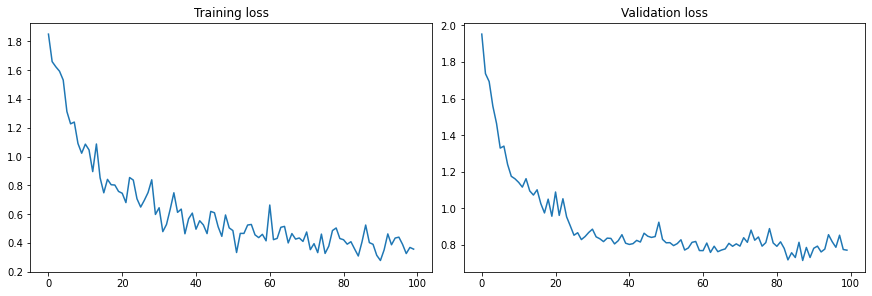

In [11]:
print("For Relu")
mlp_relu = MLPClassifier( hidden_layer_sizes=(256, 32),  max_iter=100 , batch_size = 200 , activation = 'relu' )
training_loss , validation_loss = fitter(100 , 200 , mlp_relu , X_train , y_train , X_valid , y_valid)
plotter(training_loss , validation_loss) 



For tanh
Training loss is 
0.6492397645397525

Validation loss is 
0.6807226646093036


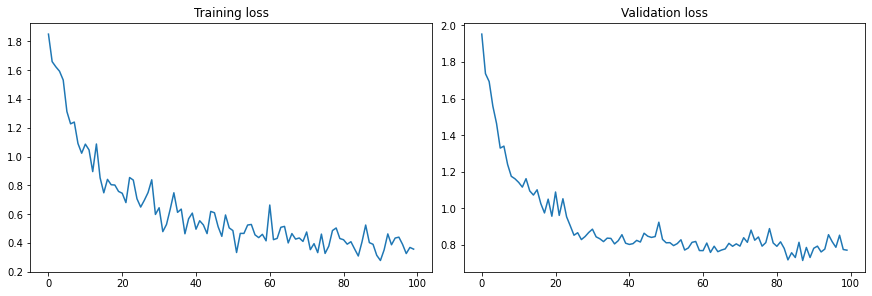

In [12]:
print("For tanh")
mlp_tanh = MLPClassifier( hidden_layer_sizes=(256, 32),  max_iter=100 , batch_size = 200 , activation = 'tanh' )
training_scores , validation_scores = fitter(100 , 200 , mlp_tanh , X_train , y_train , X_valid , y_valid)
plotter(training_loss , validation_loss) 


For Sigmoid
Training loss is 
0.6314474813424521

Validation loss is 
0.57229707947686


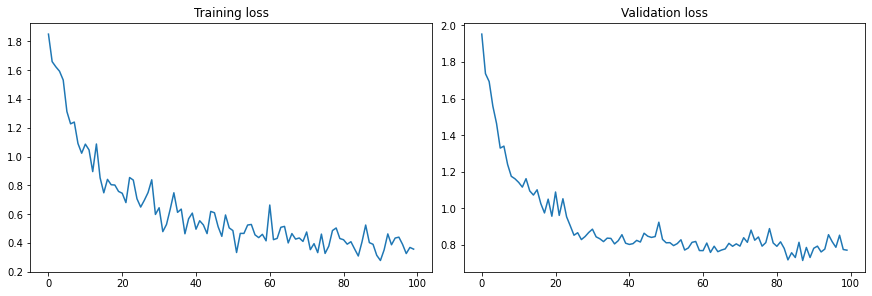

In [13]:
print("For Sigmoid")
mlp_simgoid = MLPClassifier( hidden_layer_sizes=(256, 32),  max_iter=100 , batch_size = 200 , activation = 'logistic' )
training_scores , validation_scores = fitter(100 , 200 , mlp_simgoid , X_train , y_train , X_valid , y_valid)
plotter(training_loss , validation_loss) 


For Linear
Training loss is 
1.2227473663112802

Validation loss is 
2.5158840704083048


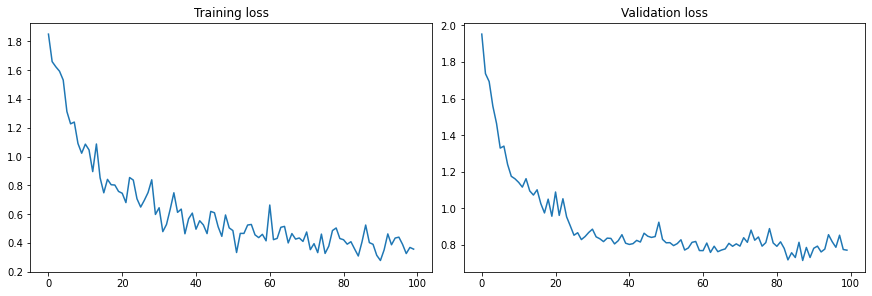

In [14]:
print("For Linear")
mlp_linear = MLPClassifier( hidden_layer_sizes=(256, 32),  max_iter=100 , batch_size = 200 , activation = 'identity' )
training_scores , validation_scores = fitter(100 , 200 , mlp_linear , X_train , y_train , X_valid , y_valid)
plotter(training_loss , validation_loss) 


In [15]:
# print("Validation Accuracy = ", accuracy_score(y_train,mlp_linear.predict(X_train)))

We can easily see that the training error is less than the validation error
Both the error decrease on increase the epochs, but almost become constant 

Training and validation error both are least on Relu

Overall Relu is performing the best among all four


For Relu learning rate  = 0.1 
Training loss is 
2.3299924211800254

Validation loss is 
2.3075881401266782


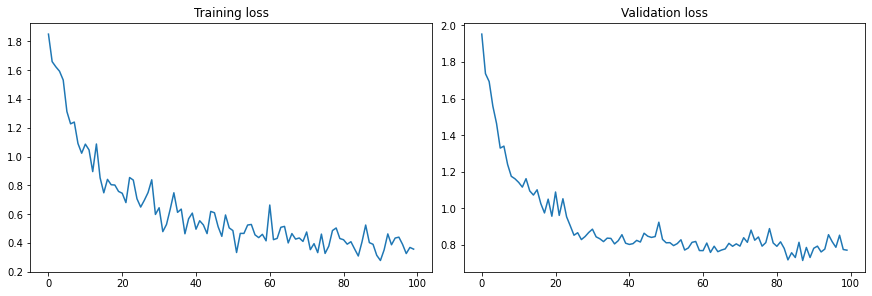

In [16]:
print("For Relu learning rate  = 0.1 ")
mlp_relu = MLPClassifier( hidden_layer_sizes=(256, 32),  max_iter=100 , batch_size = 200 , activation = 'relu'  , learning_rate_init = 0.1)
training_scores , validation_scores = fitter(100 , 200 , mlp_relu , X_train , y_train , X_valid , y_valid)
plotter(training_loss , validation_loss) 


For Relu learning rate  = 0.01 
Training loss is 
2.3034475147436226

Validation loss is 
2.3028027190449527


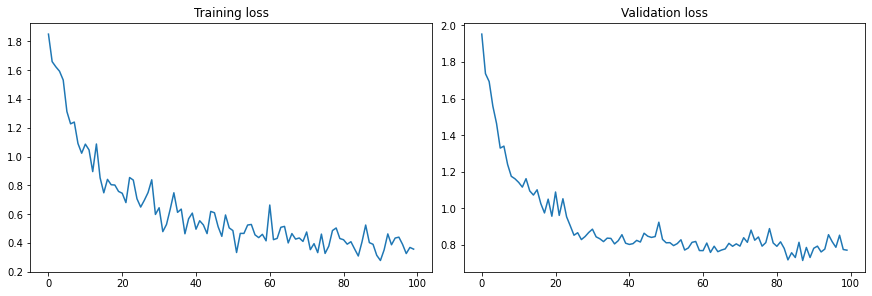

In [17]:
print("For Relu learning rate  = 0.01 ")
mlp_relu = MLPClassifier( hidden_layer_sizes=(256, 32),  max_iter=100 , batch_size = 200 , activation = 'relu'  , learning_rate_init = 0.01)
training_scores , validation_scores = fitter(100 , 200 , mlp_relu , X_train , y_train , X_valid , y_valid)
plotter(training_loss , validation_loss) 


For Relu learning rate  = 0.001 
Training loss is 
0.25428129366570756

Validation loss is 
0.8403054104521971


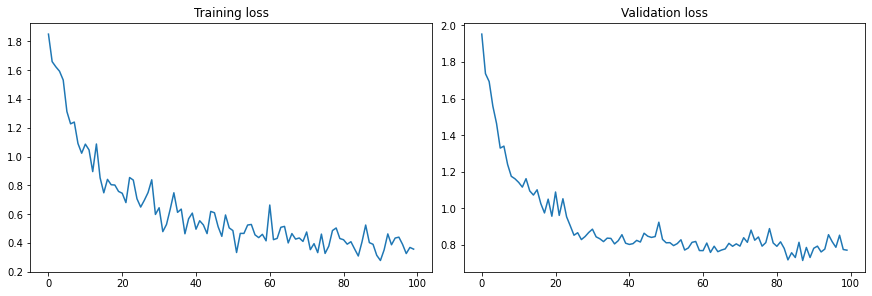

In [22]:
print("For Relu learning rate  = 0.001 ")
mlp_relu = MLPClassifier( hidden_layer_sizes=(256, 32),  max_iter=100 , batch_size = 200 , activation = 'relu'  , learning_rate_init = 0.001)
training_scores , validation_scores = fitter(100 , 200 , mlp_relu , X_train , y_train , X_valid , y_valid)
plotter(training_loss , validation_loss) 


We are getting the best results in case of learning rate = 0.001

This is because lesser learning rate helps us to easily reach the minima of the loss function

For larger learning rate we might skip the minima.

For Relu with less neurons 
Training loss is 
0.7952417314228731

Validation loss is 
0.960231474638995


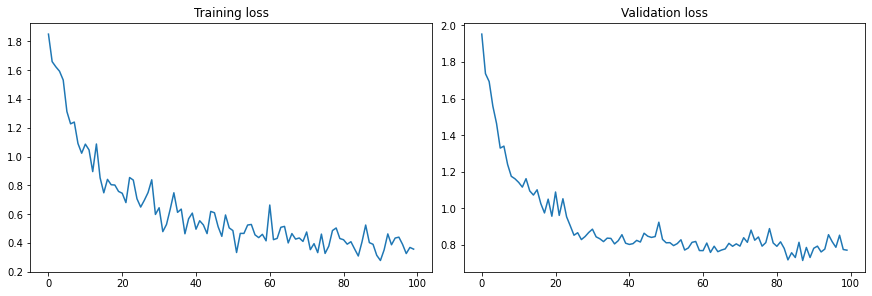

In [25]:
print("For Relu with less neurons ")
mlp_relu = MLPClassifier( hidden_layer_sizes=(220, 20),  max_iter=100 , batch_size = 200 , activation = 'relu' )
training_scores , validation_scores = fitter(100 , 200 , mlp_relu , X_train , y_train , X_valid , y_valid)
plotter(training_loss , validation_loss) 

### Decrease the number of neurons in each layer to various values.


Decreaseing the number of neurons per layers increases the loss

In [26]:
mlp_gs = MLPClassifier(max_iter=400 )
parameter_space = {
    'hidden_layer_sizes': [(256,32) , (220, 20)],
    'activation': ['relu' ] , 
    'learning_rate_init':[0.001 , 0.005 , 0.05]
    
}
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5 , verbose=2)
clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END activation=relu, hidden_layer_sizes=(256, 32), learning_rate_init=0.005; total time=  16.7s
[CV] END activation=relu, hidden_layer_sizes=(256, 32), learning_rate_init=0.005; total time=  22.3s
[CV] END activation=relu, hidden_layer_sizes=(256, 32), learning_rate_init=0.005; total time=  28.8s
[CV] END activation=relu, hidden_layer_sizes=(256, 32), learning_rate_init=0.005; total time=  25.5s
[CV] END activation=relu, hidden_layer_sizes=(256, 32), learning_rate_init=0.001; total time= 1.0min
[CV] END activation=relu, hidden_layer_sizes=(256, 32), learning_rate_init=0.05; total time=  16.9s
[CV] END activation=relu, hidden_layer_sizes=(256, 32), learning_rate_init=0.05; total time=  15.3s
[CV] END activation=relu, hidden_layer_sizes=(256, 32), learning_rate_init=0.05; total time=  14.3s
[CV] END activation=relu, hidden_layer_sizes=(256, 32), learning_rate_init=0.05; total time=  22.5s
[CV] END activation=relu, hidden_la

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=400), n_jobs=-1,
             param_grid={'activation': ['relu'],
                         'hidden_layer_sizes': [(256, 32), (220, 20)],
                         'learning_rate_init': [0.001, 0.005, 0.05]},
             verbose=2)

In [27]:
print(clf.best_params_)

{'activation': 'relu', 'hidden_layer_sizes': (256, 32), 'learning_rate_init': 0.001}
